# Evaluating Diagnostic Predictions

```{contents}
```

## Load data

In [3]:
import pandas as pd

input_path = '../Data/Processed_Data/'
clinical_data_path = '../Data/Intermediate_Files/'

# # read df_discovery and df_validation
# df_discovery = pd.read_pickle(
#     input_path+'df_discovery.pkl').sort_index()

# df_validation = pd.read_pickle(
#     input_path+'df_validation.pkl').sort_index()

# Load clinical data
discovery_clinical_data = pd.read_csv(clinical_data_path+'discovery_clinical_data.csv',
                                      low_memory=False, index_col=0)

validation_clinical_data = pd.read_csv(clinical_data_path+'validation_clinical_data.csv',
                                        low_memory=False, index_col=0)

# Load pacmap output data
df = pd.read_csv(input_path+'classifier_output/pacmap_5d_output_acute_leukemia_with_predictions.csv', index_col=0)

# drop the samples with missing labels for the ELN AML 2022 Diagnosis
df_original = df.copy()
# Handling NaN values
df = df.fillna('Unknown')

## Sankey plots

Text(0.5, 1.0, 'Pacmap 5D Output with MethylScoreAML_Dx Predictions')

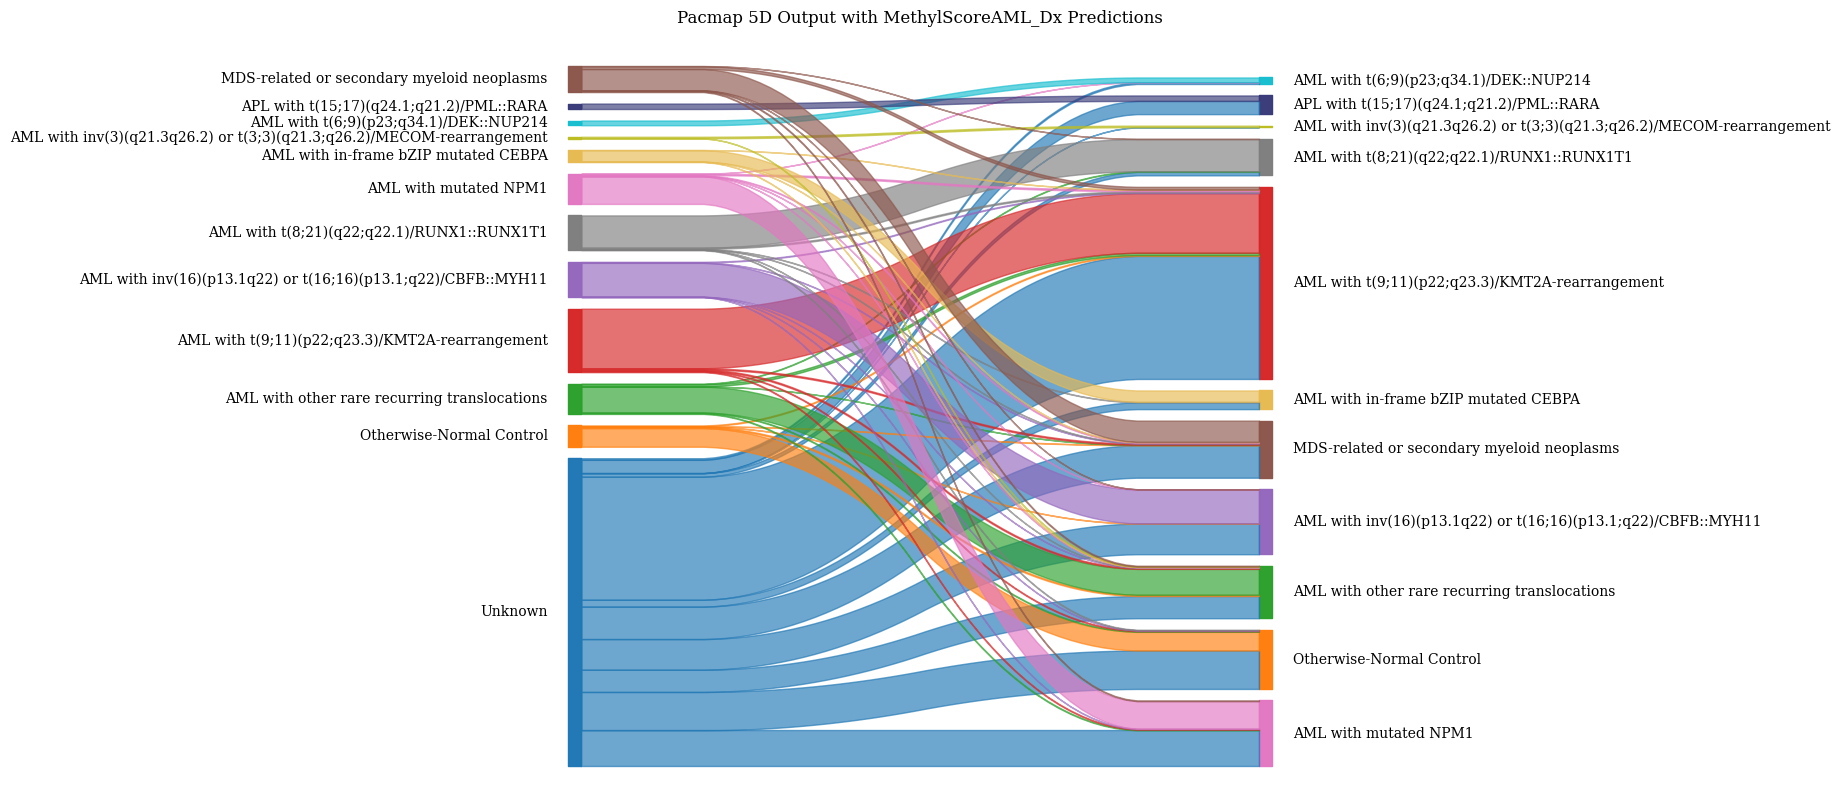

In [4]:
import pySankey
import matplotlib.pyplot as plt
from source.pacmap_functions import *
colors = get_custom_color_palette()

# make dictionary of colors with keys as class names
color_dict = {}
for i in range(len(df['ELN AML 2022 Diagnosis'].unique())): 
    color_dict[df['ELN AML 2022 Diagnosis'].unique()[i]] = colors[i]
pySankey.sankey(left = df['ELN AML 2022 Diagnosis'],right = df['MethylScoreAML_Dx_predictions'], aspect=20, colorDict=color_dict, fontsize=10)
plt.gcf().set_size_inches(10,10)
# add title
plt.title('Pacmap 5D Output with MethylScoreAML_Dx Predictions', fontsize=12)


In [16]:
df.columns

Index(['PaCMAP 1', 'PaCMAP 2', 'PaCMAP 3', 'PaCMAP 4', 'PaCMAP 5',
       'Clinical Trial', 'Sample Type', 'Patient_ID', 'ELN AML 2022 Diagnosis',
       'Train Test', 'Batch', 'Hematopoietic Lineage',
       'MethylScoreAML_Dx_predictions'],
      dtype='object')

In [15]:
df_validation = df[df['']]

,PaCMAP 1,PaCMAP 2,PaCMAP 3,PaCMAP 4,PaCMAP 5,Clinical Trial,Sample Type,Patient_ID,ELN AML 2022 Diagnosis,Train Test,Batch,Hematopoietic Lineage,MethylScoreAML_Dx_predictions
index,,,,,,,,,,,,,
0003fe29-7b8f-4ef1-b9bc-40306205f1fd_noid,14.163744,-12.102138,11.901865,15.432140,-16.474106,AAML03P1,Primary Blood Derived Cancer - Bone Marrow,PANVPB,Unknown,Discovery (train) Samples,GDC_TARGET-AML,Unknown,AML with mutated NPM1
003d9efe-90a1-42cf-84c4-03fbabefe60b_noid,-10.709123,-15.305382,-21.771700,6.981653,-21.686016,TARGET ALL,Bone Marrow Normal,TARGET-00-SJNORM054698,Unknown,Discovery (train) Samples,GDC_TARGET-ALL,Otherwise-Normal (Control),AML with inv(16)(p13.1q22) or t(16;16)(p13.1;q...
004c953f-d999-4d82-898d-c091e692df3c_noid,-14.334599,-13.189907,2.261059,25.173847,-12.793757,AAML0531,Primary Blood Derived Cancer - Peripheral Blood,PASAUT,Unknown,Discovery (train) Samples,GDC_TARGET-AML,Unknown,Otherwise-Normal Control
005fdc28-ef44-4957-bc70-ddd5c19bb4cb_noid,-5.477030,-11.416238,5.994673,7.061894,10.688519,TCGA AML,Diagnosis,TCGA-AB-2972,Unknown,Discovery (train) Samples,GDC_TCGA-AML,Unknown,AML with other rare recurring translocations
0066d4af-8019-46a0-ba29-d2962c9537a7_noid,10.688504,-27.276545,-13.803440,4.209973,16.794840,AAML0531,Primary Blood Derived Cancer - Bone Marrow,PASYWA,Unknown,Discovery (train) Samples,GDC_TARGET-AML,Unknown,Otherwise-Normal Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9426021041_R03C01,-11.987736,11.113221,19.518076,-5.899825,-18.843174,AML08,Diagnosis,AML08_SP_58,Unknown,Validation (test) Samples,St Jude Children's,Unknown,AML with t(9;11)(p22;q23.3)/KMT2A-rearrangement
9426021041_R05C02,13.759434,-13.563489,-1.080396,-14.676401,-13.194667,AML08,Diagnosis,AML08_SP_20,Unknown,Validation (test) Samples,St Jude Children's,Unknown,AML with other rare recurring translocations
9426021149_R01C01,-12.778236,13.408336,19.593397,-5.141050,-19.365086,AML08,Diagnosis,AML08_SP_34,Unknown,Validation (test) Samples,St Jude Children's,Unknown,AML with t(9;11)(p22;q23.3)/KMT2A-rearrangement


## Watermark

In [4]:
# Add watermark with all packages used
get_ipython().run_line_magic('load_ext', 'watermark')

In [5]:
get_ipython().run_line_magic('watermark', '-v -m -p pandas,pySankey,matplotlib -a Francisco_Marchi@Lamba_Lab_UF')

Author: Francisco_Marchi@Lamba_Lab_UF

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 8.12.2

pandas    : 2.0.2
pySankey  : 0.0.1
matplotlib: 3.7.1

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 5.15.90.1-microsoft-standard-WSL2
Machine     : x86_64
Processor   : x86_64
CPU cores   : 20
Architecture: 64bit

